# Project: Creating Customer Segments

## Getting Started
In this project, I analyzed a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to **best describe the variation in the different types of customers that a wholesale distributor interacts with.** Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [55]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Displays for note books
%matplotlib inline

from IPython.display import display #Allows use of display() for dataframes

#Loading the dataset for wholesale customers

df = pd.read_csv("customers.csv")
df.drop(['Channel','Region'],axis=1,inplace=True)

## Data  Exploration 
I began exploring the data through visualizations and code to understand how each feature is related to the others. Furthermore, I explored the statistical description of the dataset, consider the relevance of each feature. 

Note that the dataset is composed of six important product categories: **'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicatessen'.** Consider what each category represents in terms of products you could purchase.

In [25]:
#Description of the dataset
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Implementation: Selecting Samples¶ 
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add three indices of your choice to the indices list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [26]:
#Selecting three rows of my choice to sample from the dataset
indices=[0,1,2]

#Create a dataframe of the chosen samples 
df_sample = pd.DataFrame(data.loc[indices],columns = data.keys())
df_sample.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


## Implementation: Feature Relevance
One interesting thought to consider is if _one (or more)_ of the six product categories is actually relevant for understanding customer purchasing. **_That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products?_** We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#Assigning new data to copy of the data by removing the feature
new_data = df.drop(labels = ['Grocery'],axis=1)

#Split the data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(new_data.values,
                                                 df['Grocery'].values,
                                                   test_size=0.2,
                                                   random_state=0)
#Creating Decision Tree Regressor and fit to training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

#Prediction score of the test set using the regressor's score function
score = regressor.score(X_test,y_test)

print(score)

0.6169514453971011


**Note:** The coefficient of determination, `R^2`, is a score between 0 and 1, with being 1 being a perfect fit. If there is a low score for a particular feature, that leads me to believe that feature is hard to predict using the other features, thereby making it an important feature to consider when considering significance. 

Looking at the prediction score of 0.617 that indicates that this feature is probably not necessary for identifying the spending behavior. 


## Visualize Feature Distributions¶ 

C:\Users\William X Nguyen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001760E1455C0>,
      dtype=object)

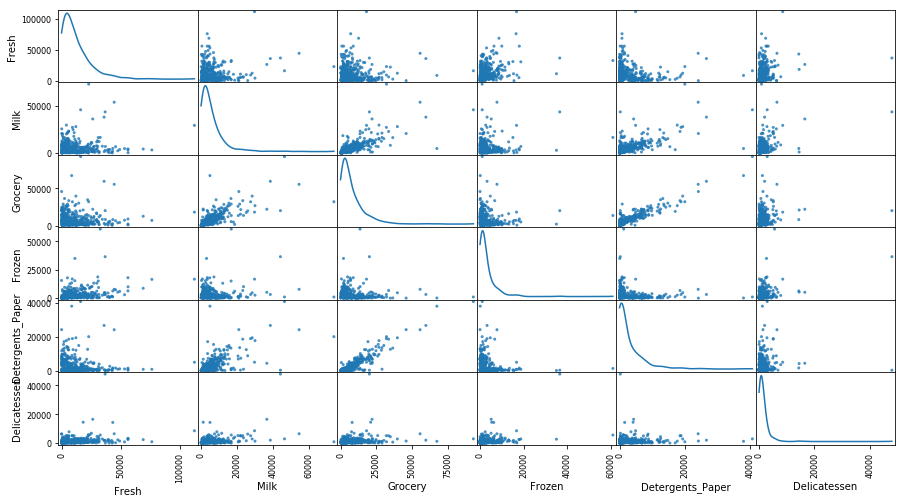

In [50]:
#Producing scatter matrix for each pair of features in the data
pd.scatter_matrix(df, alpha=0.8,figsize=(15,8),diagonal='kde')

<Figure size 1152x504 with 0 Axes>

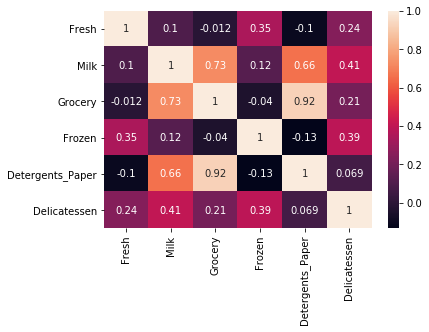

<Figure size 1152x504 with 0 Axes>

In [56]:
#Finding feature correlations and visualize them using a heatmap
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(16,7))

Scatter matrix and heatmap shows a strong linear correlation between **Detergents Paper** and **Grocery**. Furthermore, it's also interesting to see that there's no correlation between Delicatessen and any other feature. From the scatter matrix, you can also see most of the features are highly right-skewed distributed. 

## Data Preprocessing 
In this section, data preprocessing is needed to create a better representation of customers by performing **_scaling_** on the data and **detecting (and optionally removing) outliers**. 

### Implementation: Feature Scaling 
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. A simpler approach which can work in most cases would be applying the natural logarithm.

C:\Users\William X Nguyen\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001760FF6B358>,
      dtype=object)

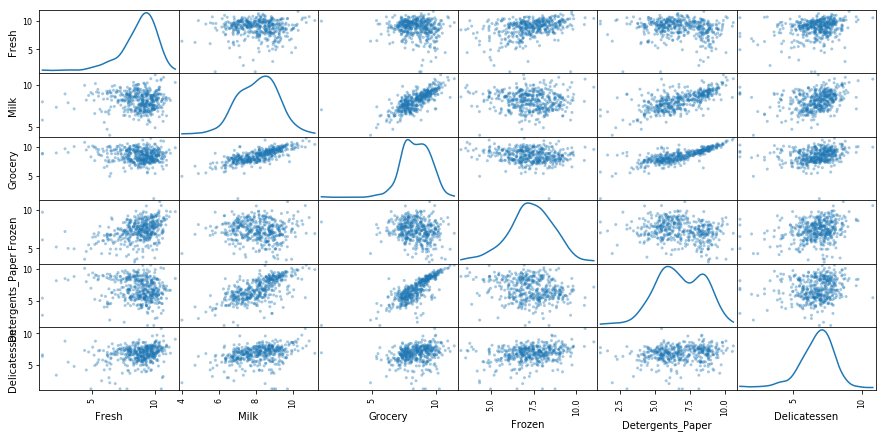

In [59]:
#Scaling the data using the logarithmic scaling 
log_data = np.log(df)

#Scaling the sample data using the natural log
log_samples = np.log(samples)

#Produce scatter matrix 
pd.scatter_matrix(log_data,alpha=0.4,figsize=(15,7),diagonal='kde')

### Observation
After applying the natural logarithm, the distribution of each feature appears much more normal. 

### Implementation: Outlier Detection
Detecting outliers in data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often **skew results**. An _outlier step_ is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an _outlier step_ outside of the IQR for that feature point is considered abnormal. 

In [94]:
all_outliers_idx = np.array([], dtype='int64')

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():

    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    
    outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outliers)
    
    all_outliers_idx = np.append(all_outliers_idx, outliers.index.values)
#Removing outliers
count = np.bincount(all_outliers_idx)

all_outliers_idx = np.unique(all_outliers_idx)
outliers = all_outliers_idx.tolist()
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers can cause major problems if I apply k-means clustering. In k-means clustering, we sume up the distances between a point and all other points that belong to the cluster center. Then adjusting the cluster center in a way that the sum of distances gets **minmized**. So, if there are outliers in the dataset, I'm likely to miss the "real" center since the outliers "pull away" points from the "real" center. Removing the points results in a loss of dataset, meaning that there are still enough points left for performing a good estimation. Thus, it's good to remove outlier samples to prevent this from happening. 

## Feature Transformation
Using principal component analysis (PCA) to draw conclusions about the structure of the customer data. Since, using PCA on a dataset **calculates the dimensions which best maximize variance, where I'll find which linear combinations of features best describe features.**

### Implementation: PCA
Applying PCA to `good data` to discover which dimensions about data best maximises the variance of features involved. PCA will report the _explained variance ratio_ of each dimension -- i.e. how much variance within the data is explained by that dimension alone. 

In [98]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.1280,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.6300,-0.0376,0.4634
Dimension 3,0.1049,-0.7452,0.1544,-0.0204,0.2670,-0.2349,0.5422
Dimension 4,0.0978,0.2667,0.1375,0.0710,-0.7133,-0.3157,0.5445
Dimension 5,0.0488,0.0114,0.7083,0.3168,0.0671,-0.4729,-0.4120
Dimension 6,0.0233,-0.0543,-0.5177,0.8267,0.0471,-0.2080,-0.0094


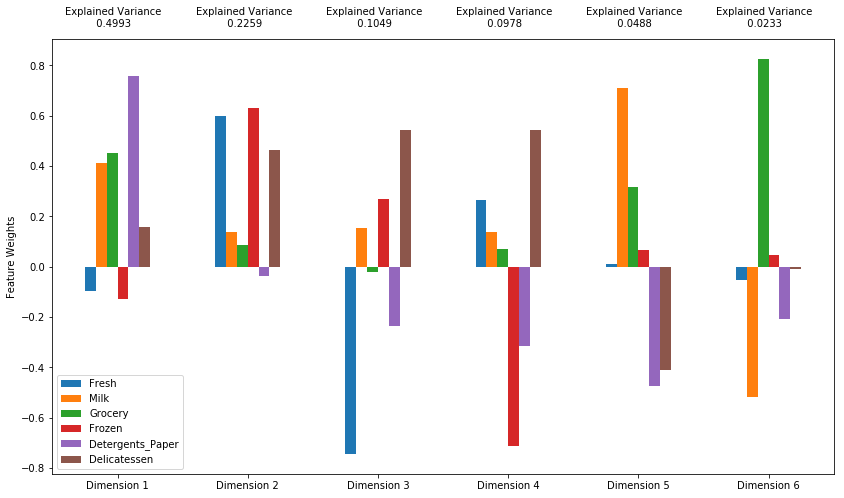

In [100]:
from sklearn.decomposition import PCA

#Applying PCA with the same number of dimensions as components
pca = PCA(n_components =6)
pca.fit(good_data)

#Transforming log_samples using the PCA
pca_samples = pca.transform(log_samples)

pca_results(good_data,pca)

In [103]:
print("The amount of variance in the data explained by the first 4 principal components: {}".format(92.79),'%')


The amount of variance in the data explained by the first 4 principal components: 92.79 %


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to **_reduce the dimensionality of the data_**... reducing the complexity of the problem. 

Dimensionality reduction comes at a cost. Fewer dimensions used implies less of the total variance in the data is being explained. Thus, the _cumulative explained variance ratio_ is important for knowing **how many dimensions are necessary for the problem**. Additionally, a significant amount of variance is explained by only two or three dimensions.

In [108]:
#Apply PCA fitting with only 2 dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

#Transform data
reduced_data = pca.transform(good_data)

#Create dataframe for reduced data (numpy array)
reduced_data = pd.DataFrame(data=reduced_data,columns=['Dimension1',
                                                      'Dimension2'])
reduced_data.head()

,Dimension1,Dimension2
0,1.779322,-0.660449
1,1.882034,0.461741
2,1.993507,1.247080
3,-0.998581,1.369364
4,0.993847,2.078314


# Clustering 
Using either K-Means clustering algorithm or a Guassian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. Then recover specific data points that belong to a clusters to understand their significance by transforming back into their original dimension and scale. 

### K-Means:
The major advantage of K-Means is its simplicity. It's fast and easy to implement where it performs a hard assignment of a point to a cluster center. 

### Gaussian Mixture Model:
GMM is a soft clustering method meaning that it provides us with a _probability_ that tells me how likely it is that a certain point belongs to each cluster center. A point is assigned to the cluster with the highest probability. In contrast to K-Means, GMM can deal with clusters of arbitrary shape. 

Thus, I want to go for GMM clustering.

## Implementation: Creating Clusters
Depending on the problem, the number of clusters that I expect to be in the data may already be known. When the no. of clusters is not known prior, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data. 

However, I can quantify the "goodness" of a clustering by calculating each data point's _silhouette coefficient_. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering. 

In [113]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def calcGMM(num_components):
    #Applying clustering algorithm of choice to reduced data
    cluster = GaussianMixture(n_components = num_components,random_state=10)
    cluster.fit(reduced_data)
    
    #Predict the cluster for each data point
    pred = cluster.predict(reduced_data)
    
    #Finding the cluster centers using the algorithms attribute 
    centres = cluster.means_
    
    score = silhouette_score(reduced_data,labels=pred)
    return score

for i in range(2,15):
    print(str(i)+' clusters: '+str(calcGMM(i)))

2 clusters: 0.446753526944537
3 clusters: 0.3611936250386726
4 clusters: 0.3070283472612148
5 clusters: 0.3130565651766996
6 clusters: 0.2502865959421159
7 clusters: 0.3337023659791359
8 clusters: 0.2842308942476544
9 clusters: 0.31845211558942094
10 clusters: 0.2975093865320504
11 clusters: 0.30074167196796514
12 clusters: 0.32064076240231487
13 clusters: 0.3291472270624952
14 clusters: 0.32972342902524004


### Cluster Visualization
The number of clusters that has the best silhouette score is **2**. this is the optimal number of clusters for my clustering algorithm using the scoring metric above.

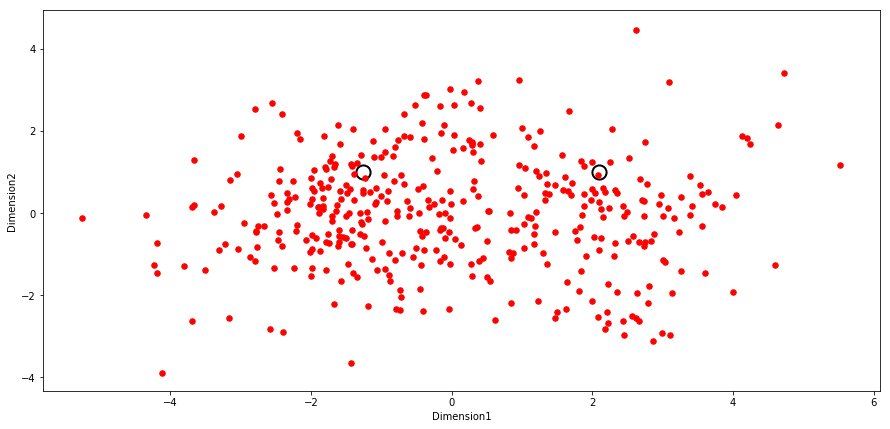

In [126]:
#Applying clustering algorithm to reduced data
cluster = GaussianMixture(n_components =2,random_state=20)
cluster.fit(reduced_data)

#Predicting cluster for each data point
pred = cluster.predict(reduced_data)

#Finding clustering center
centres = cluster.means_

score = silhouette_score(reduced_data,pred)

#Displaying results of clustering
def cluster_results(reduced_data,pred,centres):
    #Creating predictions Dataframe to plot
    predictions = pd.DataFrame(pred,columns=['Clusters'])
    
    #Plotting data
    plot_data = pd.concat([predictions,reduced_data],axis=1)
    
    #Generating cluster plot 
    fig,ax=plt.subplots(figsize=(15,7))
    
    
    #Plotting centers with indicators:
    for i,c in enumerate(centres):
        ax.scatter(x=c[0],y=[1],color='white',edgecolors='black',
                   lw=2,marker='o',s=200)
        
    #Coloring points based on assigned cluster
    for i, cluster in plot_data.groupby("Clusters"):
        cluster.plot(ax=ax,kind='scatter',x='Dimension1',y='Dimension2',
                    color= 'red',
                    s=30,)

cluster_results(reduced_data,pred,centres)

### Implementation: Data Recovery
Each cluster has a central point. These centers (mean values) are not specifically data points from the data, but averages of all the data points predicted in the clusters. For the problem, of creating customer segments, a cluster's center point corresponds to the average customer of that segment.

Since data is currently reduced in dimension and scaled by a logarithm, I need to recover the representative customer spending from these data points by applying inverse transformations. 

In [137]:
#Inverse transform the centers
log_centres = pca.inverse_transform(centres)

#Exponentiate the centers (since I logged it)
true_centres = np.exp(log_centres)

#Display true centers
segments = ['Segments {}'.format(i) for i in range(0,len(centres))]
true_centres = pd.DataFrame(data = np.round(true_centres),columns=data.keys())
true_centres.index = segments

true_centres.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segments 0,9494.0,2049.0,2598.0,2203.0,337.0,796.0
Segments 1,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0


TypeError: 'list' object cannot be interpreted as an integer

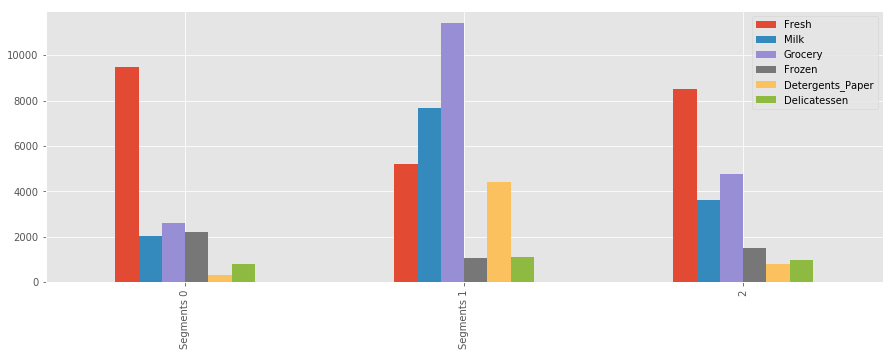

In [163]:
plt.style.use('ggplot')
compare = true_centres.copy()
#Adding another row for median
compare.loc[true_centres.shape[0]] = data.median()

compare.plot(kind='bar',figsize=(15,5))
labels= true_centres.index.tolist()
labels.append('Data Median')
plt.xticks(range(compare.shape[0],labels))


Milk's, Grocery's and Detergents_Paper's mean are above the average. But also fresh goods and Delicatessen get purchased frequently. It seems to me that this category might be the one that represents supermarkets and retailers.

# Conclusion 
1. Consider how the different groupes of customers, the **_customer segments_**. 
2. Consider how giving a label to each customer (which segments that customer belongs to) can provide for additional features about customer data.
3. Finally, compare the **_customer segments_** to a hidden variable present in the data to see whether the clustering identified certain relationships. 

Companies will often run `A/B tests` when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. 

### Recommendation
There are companies with a need for fresh foods and milk might profit from changing the delivery service from 5 days a week to 3 days a week. So if a client belongs to a particular customer segments which has a higher demand for fresh goods/milk, I can conclude the client will profit from this change. 

I would choose segment 1 since it has a higher demand for fresh goods thus client will profit more from this change. 

A way to verify our assumption is by **A/B testing.**
I split each cluster into 2 groups called control/treatment group. The control group comprises of customers who receive their goods 5 days a week. The treatment group will profit from the new 3-day-a-week delivery. Then measuring how the customer satisfaction (e.g. conduct a survey) of every group and compare them to each other. **_This is done for both clusters to test if initial assumption was correct, one cluster should show a stronger increase in satisfaction._**

## Final Notes
Additional Structure is derived from originally unlabeled data when using clustering techniques.
- Each customer has their associated **_customer segment_** it best identifies with. 